In [1]:
# Importing the necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.max_columns', None)

In [7]:
import os
root_dir = "/content/drive/My Drive"
from google.colab import drive
drive.mount('/content/drive')
project_folder = "/Colab Notebooks/"
os.chdir(root_dir + project_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Importing the dataset
train = pd.read_csv("Training.csv")
train = train.dropna(axis=1)
test = pd.read_csv("Testing.csv")
train = train.dropna(axis=1)


# Loading the dataset
X_train = train.drop('prognosis',axis=1)  # features (symptoms)
y_train = train['prognosis']  # target variable (disease)
X_test = test.drop('prognosis',axis=1)
y_test = test['prognosis'] 


##                                                                _Exploratory Data Analysis_

In [10]:
## No of occurences of each symptom in this dataset
print(X_train.apply(pd.Series.value_counts))

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0     4242       4134                  4812                 4698       4812   
1      678        786                   108                  222        108   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0    4122        4236          4698     4698              4812   
1     798         684           222      222               108   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0            4812      3006                 4704                 4812   
1             108      1914                  216                  108   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0     2988         4806     4806                  4806         4692   
1     1932          114      114                   114          228   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0         4464          4692      4464               4812   
1      

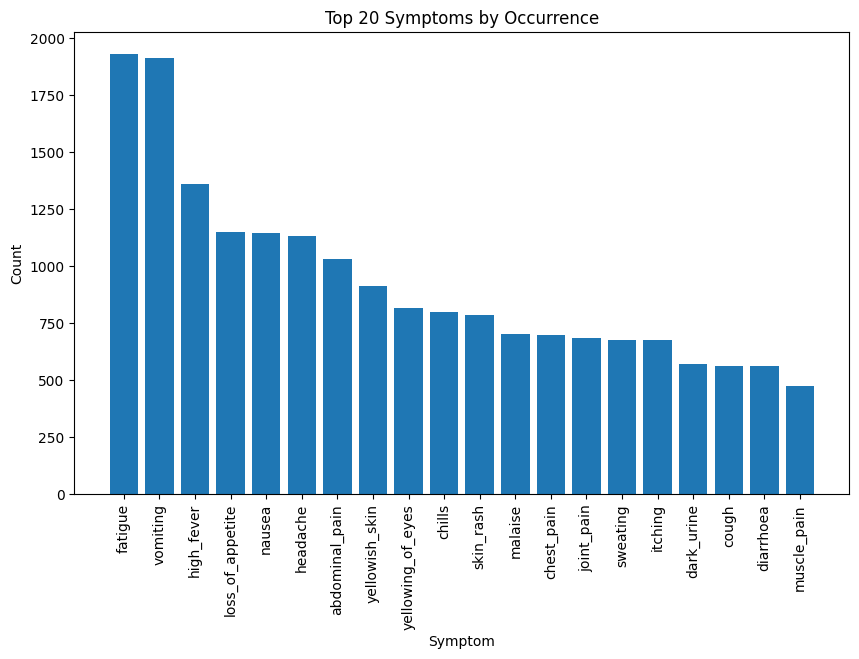

The barplot shows top 20 symptoms in decreasing order. Top 5 of them include fatigue, vomiting, high fever, nausea and loss of apetite.


In [11]:
# Count the number of occurrences of '1' in each column and sort in descending order
symptom_counts = X_train.sum().sort_values(ascending=False)

# Select the top 20 symptoms
top_20_symptoms = symptom_counts[:20]

# Create a barplot of the top 20 symptoms
plt.figure(figsize=(10, 6))
plt.bar(top_20_symptoms.index, top_20_symptoms.values)
plt.xticks(rotation=90)
plt.xlabel('Symptom')
plt.ylabel('Count')
plt.title('Top 20 Symptoms by Occurrence')
plt.show()

print("The barplot shows top 20 symptoms in decreasing order. Top 5 of them include fatigue, vomiting, high fever, nausea and loss of apetite.")

In [12]:
## No of unique diseases as identified from the prognosis column
len(y_train.unique())
print("The number of unique diseases is 41")

The number of unique diseases is 41


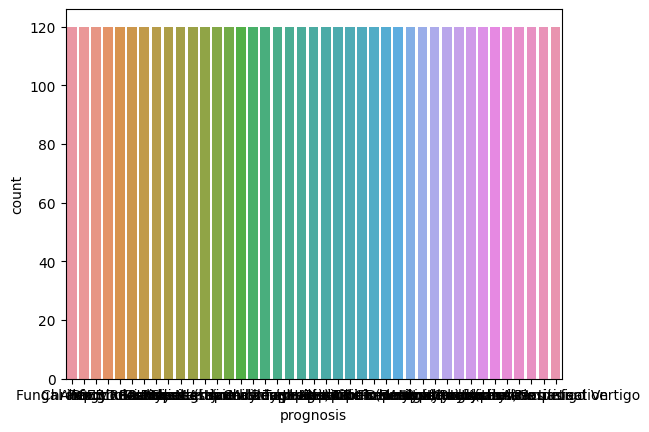

As seen from the graph, the number of values for each prognosis is 120.


In [13]:
## No of values for each prognosis
sns.countplot(x="prognosis", data=train)
plt.show()
print("As seen from the graph, the number of values for each prognosis is 120.")

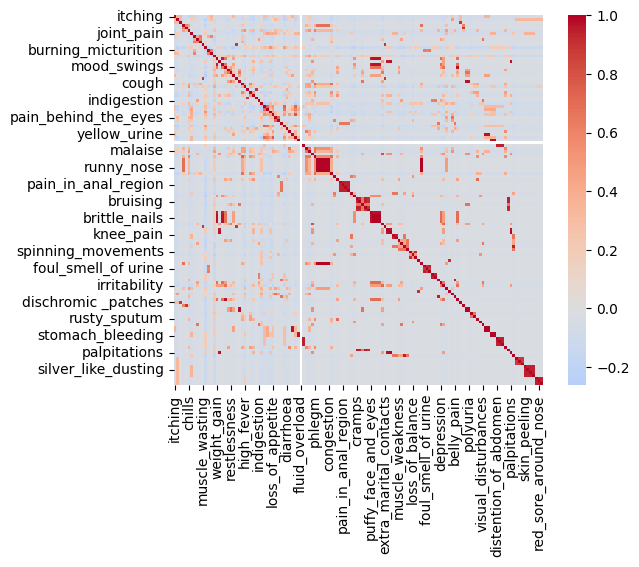

In [14]:
# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, annot=False)

# Show the plot
plt.show()

## _K-Means Clustering_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

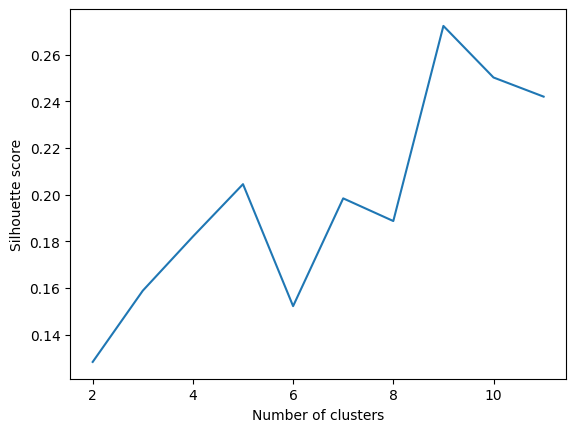

In [15]:
### Using K-means clustering to find out diseases that are similar

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores for each number of clusters
plt.plot(range(2, 12), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


In [16]:
# Choose the number of clusters with the highest silhouette score and then perform K-means clustering
kmeans = KMeans(n_clusters=9, random_state=0).fit(X_train)

# Add the cluster labels to the dataset
train['cluster'] = kmeans.labels_

# Print the number of data points in each cluster
print(train['cluster'].value_counts())
train


## Grouping the diseases with similar clusters
cluster_counts = train.groupby('cluster')['prognosis'].value_counts()

# Print the count of each cluster
print(cluster_counts)
print('\n')
print("We can see the diseases grouped based on cluster assignment. This means that the symptoms for the diseases belonging to the same cluster are likely to be similar.")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3    2640
0     840
7     240
8     240
1     240
5     240
2     240
4     120
6     120
Name: cluster, dtype: int64
cluster  prognosis                              
0        Chronic cholestasis                        120
         Hepatitis B                                120
         Hepatitis C                                120
         Hepatitis D                                120
         Hepatitis E                                120
         Jaundice                                   120
         hepatitis A                                120
1        Chicken pox                                120
         Dengue                                     120
2        Hyperthyroidism                            120
         Hypothyroidism                             120
3        (vertigo) Paroymsal  Positional Vertigo    120
         AIDS                                       120
         Acne                                       120
         Alcoholic hepatitis                     

In [17]:
test['clusters'] = kmeans.predict(X_test)
test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,clusters
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,3
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allergy,3
2,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GERD,3
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chronic cholestasis,0
4,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drug Reaction,3
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae,3
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## _Random Forest Model_

In [18]:
### Building a predictive model using Random Forest Method

# Creating a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the random forest classifier
rf.fit(X_train, y_train)

# Making predictions on the testing set
y_pred1 = rf.predict(X_test)

# Evaluating the performance of the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred1)
precision_rf = precision_score(y_test, y_pred1,average='weighted')
recall_rf = recall_score(y_test, y_pred1,average='weighted')
f1_rf = f1_score(y_test, y_pred1,average='weighted')

print('Accuracy with Random Forest method:', accuracy_rf)
print('Precision with Random Forest method:', precision_rf)
print('Recall with Random Forest method:', recall_rf)
print('F1 with Random Forest method:', f1_rf)
print('\n')

Accuracy with Random Forest method: 0.9761904761904762
Precision with Random Forest method: 0.9880952380952381
Recall with Random Forest method: 0.9761904761904762
F1 with Random Forest method: 0.9761904761904762




In [19]:
## Getting prediction probabilities for each column using Random Forest classifier
rf_pred_prob = rf.predict_proba(X_test)

#print(y_pred_prob)

# Get the labels of each prognosis value
rf_prognosis_labels = rf.classes_

# Create a pandas DataFrame to store the predicted probabilities and their labels
pred_rf = pd.DataFrame(rf_pred_prob, columns=rf_prognosis_labels)

display(pred_rf)


,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,Common Cold,Dengue,Diabetes,Dimorphic hemmorhoids(piles),Drug Reaction,Fungal infection,GERD,Gastroenteritis,Heart attack,Hepatitis B,Hepatitis C,Hepatitis D,Hepatitis E,Hypertension,Hyperthyroidism,Hypoglycemia,Hypothyroidism,Impetigo,Jaundice,Malaria,Migraine,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
5,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
6,0.0,1.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
7,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
8,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
9,0.0,0.00,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


## _Multinomial Logistic Regression_

In [20]:
# Create and train a multinomial logistic regression model
mlr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
mlr.fit(X_train, y_train)

# Predict the output variable for the testing dataset
y_pred3 = mlr.predict(X_test)

# Calculate accuracy of the model
accuracy_mlr = accuracy_score(y_test, y_pred3)
precision_mlr = precision_score(y_test, y_pred3,average='weighted')
recall_mlr = recall_score(y_test, y_pred3,average='weighted')
f1_mlr = f1_score(y_test, y_pred3,average='weighted')

print('Accuracy for Multinomial Logistic Regression:', accuracy_mlr)
print('Precision with Multinomial Logistic Regression:', precision_mlr)
print('Recall with Multinomial Logistic Regression:', recall_mlr)
print('F1 with Multinomial Logistic Regression:', f1_mlr)
print('\n')

Accuracy for Multinomial Logistic Regression: 1.0
Precision with Multinomial Logistic Regression: 1.0
Recall with Multinomial Logistic Regression: 1.0
F1 with Multinomial Logistic Regression: 1.0




In [22]:
## Getting prediction probabilities for each column using Multiple Logistic Regression classifier
mlr_pred_prob = mlr.predict_proba(X_test)

#print(y_pred_prob)

# Get the labels of each prognosis value
mlr_prognosis_labels = mlr.classes_

# Create a pandas DataFrame to store the predicted probabilities and their labels
pred_mlr = pd.DataFrame(mlr_pred_prob, columns=mlr_prognosis_labels)
merged_df = pd.concat([X_train,pred_mlr],axis=1)
display(merged_df)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,Common Cold,Dengue,Diabetes,Dimorphic hemmorhoids(piles),Drug Reaction,Fungal infection,GERD,Gastroenteritis,Heart attack,Hepatitis B,Hepatitis C,Hepatitis D,Hepatitis E,Hypertension,Hyperthyroidism,Hypoglycemia,Hypothyroidism,Impetigo,Jaundice,Malaria,Migraine,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000093,0.000202,0.000730,0.000088,0.000257,0.000175,0.000111,0.000174,0.000277,0.000372,0.000035,0.000043,0.000076,0.000191,0.001595,0.992518,0.000101,0.000214,0.000206,0.000091,0.000086,0.000012,0.000016,0.000148,0.000062,0.000040,0.000062,0.000466,0.000186,0.000048,0.000091,0.000131,0.000188,0.000103,0.000052,0.000369,0.000017,0.000028,0.000196,0.000124,0.000027
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000105,0.000324,0.000325,0.000141,0.993760,0.000247,0.000125,0.000249,0.000040,0.000070,0.000149,0.000057,0.000102,0.000270,0.000199,0.000322,0.000138,0.000272,0.000197,0.000057,0.000176,0.000030,0.000022,0.000186,0.000074,0.000045,0.000080,0.000202,0.000056,0.000220,0.000117,0.000187,0.000254,0.000165,0.000133,0.000184,0.000042,0.000106,0.000366,0.000169,0.000034
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## _CART Model_

In [23]:
### Building a predictive model using CART Method
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Predict the output variable for the testing dataset
y_pred4 = dtc.predict(X_test)

# Calculate accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred4)
precision_dt = precision_score(y_test, y_pred4,average='weighted')
recall_dt = recall_score(y_test, y_pred4,average='weighted')
f1_dt = f1_score(y_test, y_pred4,average='weighted')

print('Accuracy for CART:', accuracy_dt)
print('Precision with CART:', precision_dt)
print('Recall with CART:', recall_dt)
print('F1 with CART:', f1_dt)


Accuracy for CART: 0.9761904761904762
Precision with CART: 0.9880952380952381
Recall with CART: 0.9761904761904762
F1 with CART: 0.9761904761904762


In [24]:
## Getting prediction probabilities for each column using Decision Tree classifier
dtc_pred_prob = dtc.predict_proba(X_test)

#print(y_pred_prob)

# Get the labels of each prognosis value
dtc_prognosis_labels = dtc.classes_

# Create a pandas DataFrame to store the predicted probabilities and their labels
pred_dtc = pd.DataFrame(dtc_pred_prob, columns=dtc_prognosis_labels)

display(pred_dtc)

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,Common Cold,Dengue,Diabetes,Dimorphic hemmorhoids(piles),Drug Reaction,Fungal infection,GERD,Gastroenteritis,Heart attack,Hepatitis B,Hepatitis C,Hepatitis D,Hepatitis E,Hypertension,Hyperthyroidism,Hypoglycemia,Hypothyroidism,Impetigo,Jaundice,Malaria,Migraine,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## _KNN Algorithm_

In [25]:
## Building a predictive model using K Nearest Neighbors
# define the KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier and make predictions on the test set
knn.fit(X_train, y_train)
y_pred5 = knn.predict(X_test)

# Evaluating the performance of the KNN classifier using accuracy score
accuracy_knn = accuracy_score(y_test, y_pred5)
precision_knn = precision_score(y_test, y_pred5,average='weighted')
recall_knn = recall_score(y_test, y_pred5,average='weighted')
f1_knn = f1_score(y_test, y_pred5,average='weighted')

print('Accuracy with KNN:', accuracy_knn)
print('Precision with KNN:', precision_knn)
print('Recall with KNN:', recall_knn)
print('F1 with KNN:', f1_knn)
print('\n')

Accuracy with KNN: 1.0
Precision with KNN: 1.0
Recall with KNN: 1.0
F1 with KNN: 1.0




In [26]:
## Getting prediction probabilities for each column using KNN Classifier
knn_pred_prob = knn.predict_proba(X_test)

#print(y_pred_prob)

# Get the labels of each prognosis value
knn_prognosis_labels = knn.classes_

# Create a pandas DataFrame to store the predicted probabilities and their labels
pred_knn = pd.DataFrame(knn_pred_prob, columns=knn_prognosis_labels)

display(pred_knn)

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,Common Cold,Dengue,Diabetes,Dimorphic hemmorhoids(piles),Drug Reaction,Fungal infection,GERD,Gastroenteritis,Heart attack,Hepatitis B,Hepatitis C,Hepatitis D,Hepatitis E,Hypertension,Hyperthyroidism,Hypoglycemia,Hypothyroidism,Impetigo,Jaundice,Malaria,Migraine,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
